بارگذاری داده تمیز

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path.cwd().parent

proc_v2 = project_root / "data" / "processed" / "v2"
fig_dir = project_root / "reports" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

match_fp = proc_v2 / "match_clean_v2.parquet"
power_fp = proc_v2 / "power_clean_v2.parquet"

df_match = pd.read_parquet(match_fp)
df_power = pd.read_parquet(power_fp)

print("Using project_root:", project_root)
print("match file:", match_fp)
print("power file:", power_fp)

print("\nshape:", df_match.shape)
print(df_match[["match_id", "tournament_name"]].head())


Using project_root: c:\Users\mit\Desktop\Final_Project
match file: c:\Users\mit\Desktop\Final_Project\data\processed\v2\match_clean_v2.parquet
power file: c:\Users\mit\Desktop\Final_Project\data\processed\v2\power_clean_v2.parquet

shape: (16873, 64)
   match_id tournament_name
0  11974049      Qualifiers
1  11974052      Qualifiers
2  11974053      Qualifiers
3  11974065      Qualifiers
4  11974066      Qualifiers


groupby و شمارش

Saved figure to c:\Users\mit\Desktop\Final_Project\reports\figures\ExtraQ4_tournaments_with_most_matches.png


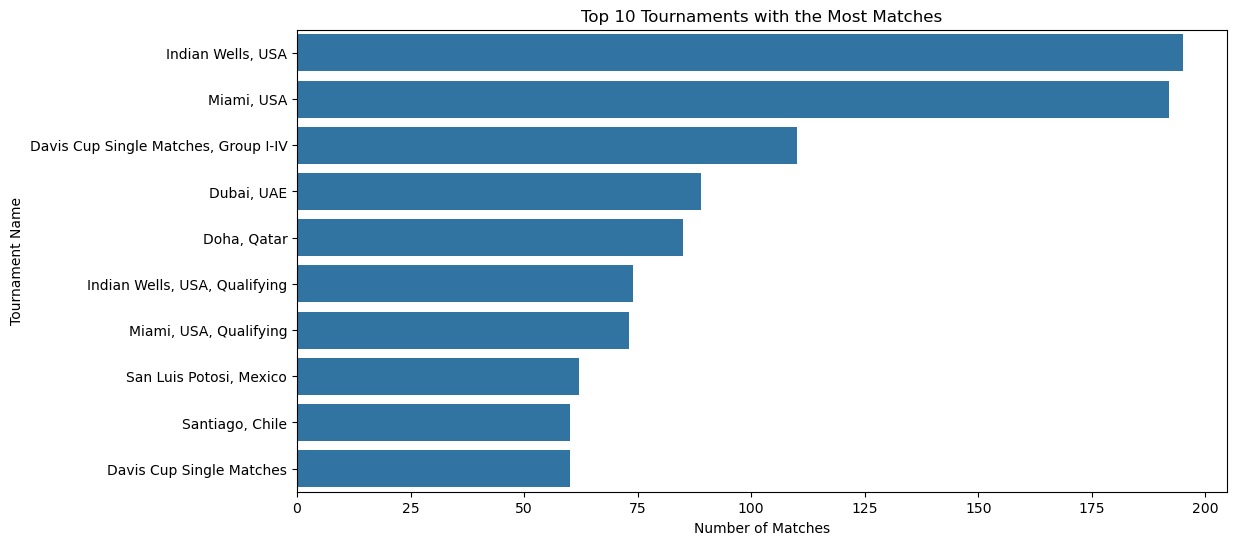

In [8]:
tournament_counts = (
    df_match.groupby("tournament_name")
    .size()
    .reset_index(name="num_matches")
    .sort_values("num_matches", ascending=False)
    .head(10)
)

# ترسیم نمودار
plt.figure(figsize=(12, 6))
sns.barplot(data=tournament_counts, x="num_matches", y="tournament_name")
plt.xlabel("Number of Matches")
plt.ylabel("Tournament Name")
plt.title("Top 10 Tournaments with the Most Matches")

# ذخیره در مسیر نسبی
output_path = fig_dir / "ExtraQ4_tournaments_with_most_matches.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
print(f"Saved figure to {output_path}")

plt.show()
plt.close()

پیدا کردن بیشترین

In [3]:
top_tournament = tournament_counts.iloc[0]

print("the tournament with the most matches:")
print("Tournament:", top_tournament["tournament_name"])
print("Number of matches:", top_tournament["num_matches"])


the tournament with the most matches:
Tournament: Indian Wells, USA
Number of matches: 195


نمودار

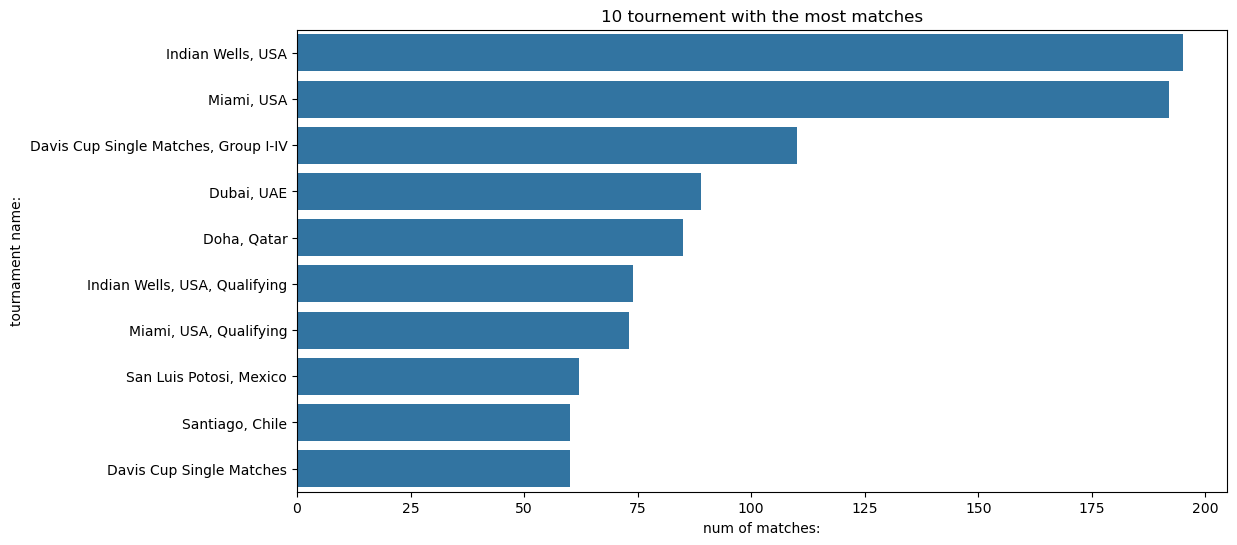

In [4]:
tournament_counts = (
    df_match.groupby("tournament_name")
    .size()
    .reset_index(name="num_matches")
    .sort_values("num_matches", ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(data=tournament_counts, x="num_matches", y="tournament_name")
plt.xlabel("num of matches:")
plt.ylabel("tournament name:")
plt.title("10 tournement with the most matches")
plt.savefig(fig_dir / "q5_top_tournaments.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


ذخیره نتیجه

In [ ]:
from pathlib import Path

project_root = Path.cwd().parent

answers_dir = project_root / "reports" / "answers"
answers_dir.mkdir(parents=True, exist_ok=True)

output_file = answers_dir / "ExtraQ4_tournament_match_counts.csv"
tournament_counts.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"Saved to {output_file}")


Saved to c:\Users\mit\Desktop\Final_Project\reports\answers\ExtraQ4_tournament_match_counts.csv
